## Load Dataset

In [899]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import Logistic
from Logistic import LogisticRegression 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 


df = pd.read_csv('loan.csv')
df.head()
df.shape

logis = LogisticRegression()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


(614, 13)

## Dataset Info

In [900]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [901]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [902]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
df = df.dropna()
#df.head(30)
df.shape


(480, 12)

## Encode 

In [903]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender = df.Gender.map({'Male':1,'Female':0})
df.Married = df.Married.map({'Yes':1, 'No':0})
df.Education = df.Education.map({'Graduate':1, 'Not Graduate':0})
df.Self_Employed = df.Self_Employed.map({'Yes':1, 'No':0})
df.Property_Area = df.Property_Area.map({'Urban':3, 'Rural':1, 'Semiurban':2})
df.Loan_Status = df.Loan_Status.map({'Y':1, 'N':0})
df.Dependents = df.Dependents.map({'3+':3, '2':2, '1':1, '0':0 })

df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,3,1
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,3,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0
10,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,3,1


## Data process

In [904]:
#df.sample(frac=1).reset_index(drop=True)
#df.head(20)
df = df.astype('float')
df.shape
#df.sample(frac=0.8)


(480, 12)

In [905]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization

df = df.iloc[np.random.permutation(len(df))]

X_train = df.iloc[0:400, 0:10]
y_train = df.iloc[0:400, 11]

x_test = df.iloc[401: , 0:10]
y_test = df.iloc[401: , 11]





## Train

itr==0, loss==1.5071421734613353
itr==500, loss==0.45901543196961275
itr==1000, loss==0.4590154319695102
itr==1500, loss==0.4590154319695102
itr==2000, loss==0.4590154319695102
itr==2500, loss==0.4590154319695102
itr==3000, loss==0.4590154319695102
itr==3500, loss==0.4590154319695102
itr==4000, loss==0.4590154319695102
itr==4500, loss==0.4590154319695102
itr==5000, loss==0.4590154319695102
itr==5500, loss==0.4590154319695102
itr==6000, loss==0.4590154319695102
itr==6500, loss==0.4590154319695102
itr==7000, loss==0.4590154319695102
itr==7500, loss==0.4590154319695102
itr==8000, loss==0.4590154319695102
itr==8500, loss==0.4590154319695102
itr==9000, loss==0.4590154319695102
itr==9500, loss==0.4590154319695102
finally loss:0.4590154319695102


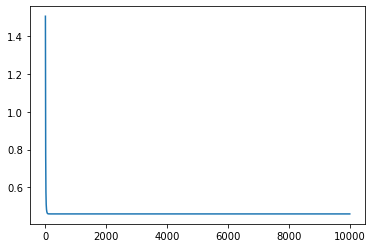

In [906]:
# from Logistic import LogisticRegression
import matplotlib.pyplot as plt

lr = 0.01
tol = 1e-7
max_iter=10000

def train(X, y, lr, tol=1e-7, max_iter=10000):
        """
        Fit the regression coefficients via gradient descent or other methods 
        """
        # 首先对X进行标准化
        X = np.array(X)
        n,m = X.shape
        y = np.array(y)
        mu = np.mean(X, axis=0)     # 列的均值
        sigma = np.std(X, axis=0)   # 列的标准差
        X = (X - mu)/sigma
        # add ones
        X = np.c_[X, np.ones((n,1))]
        # int w
        w = np.random.randn(m+1)    # 标准正态的随机浮点矩阵
        
        loss = []
        iters = []
        # gradient descent
        for i in range(int(max_iter)):
            y_p = logis.sigmoid(np.dot(np.transpose(w), np.transpose(X)))
            #print(y_p)
            if i%500 == 0:
                print(f'itr=={i}, loss=={logis.loss_f(y, y_p)}')
            loss.append(logis.loss_f(y, y_p))
            iters.append(i)
            dw = np.dot((y_p - y), X)/n # 求dw
            w = w - lr*dw               # 梯度下降 lr为学习率
        y_p = logis.sigmoid(np.dot(w, np.transpose(X)))
        print(f'finally loss:{logis.loss_f(y, y_p)}')
        plt.plot(iters, loss)
        return w, mu, sigma
        
# Task4 train your model and plot the loss curve of training
w, mu, sigma = train(X_train, y_train, lr, tol, max_iter)

## Test

In [907]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
y_p = logis.predict(x_test, y_test, w, mu, sigma)
print(y_p)

acc = 0.7848101265822784
[1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1.]
